In [2]:
import numpy as np
from matplotlib import pyplot

First we define some parameters for our system

In [3]:
kappa = 20
lamda = 0.005
rho = 0.005
mu = 0.02
mean_s = kappa / lamda
mean_x = mean_s * rho / mu

In [4]:
def corr_ss(t):
    return mean_s * np.exp(-np.abs(t) * lamda)

def corr_xs_(t):
    return rho * mean_s / (lamda + mu) * np.exp(-lamda * t)

def corr_sx_(t):
    a = rho * mean_s / (lamda - mu)
    b1 = (1 + (lamda - mu)/(lamda + mu))*np.exp(-mu * t)
    b2 = - np.exp(-lamda * np.abs(t))
    return a * (b1 + b2)

def corr_xs(t):
    return np.where(t >= 0, corr_xs_(t), corr_sx_(-t))
    
def corr_sx(t):
    return np.where(t >= 0, corr_sx_(t), corr_xs_(-t))

def corr_xx(t):
    c1 = np.exp(-mu * np.abs(t)) - np.exp(-lamda * np.abs(t))
    c2 = np.exp(-mu * np.abs(t))
    d1 = rho**2 / (lamda**2 - mu**2) * mean_s
    d2 = (1+rho/(lamda-mu))*mean_x
    return (d1*c1 + d2*c2)

def time_matrix(N, delta_t):
    time_stamps = np.expand_dims(np.arange(0, N, delta_t), 0)
    return time_stamps - time_stamps.T

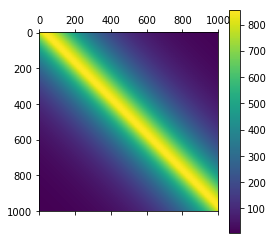

In [5]:
t = time_matrix(1000, 1)
c_ss = corr_ss(t)
c_sx = corr_sx(t)
c_xs = corr_xs(t)
c_xx = corr_xx(t)
pyplot.matshow(c_sx)
pyplot.colorbar();


In [6]:
def mutual_information_from_matrix(t):
    c_ss = corr_ss(t)
    c_sx = corr_sx(t)
    c_xs = corr_xs(t)
    c_xx = corr_xx(t)
    
    sign, det_c_ss = np.linalg.slogdet(c_ss)
    assert sign == 1
    sign, det_c_xx = np.linalg.slogdet(c_xx)
    assert sign == 1
    
    z = np.block([[c_ss, c_xs], [c_sx, c_xx]])
    sign, det_z = np.linalg.slogdet(z)
    assert sign == 1
                
    return 0.5 * (det_c_ss + det_c_xx - det_z)

In [7]:
def mutual_information_(L, delta_t):
    return mutual_information_from_matrix(time_matrix(L, delta_t))

mutual_information = np.frompyfunc(mutual_information_, 2, 1)

In [8]:
mutual_information(10, 0.01)

0.15746709711197582

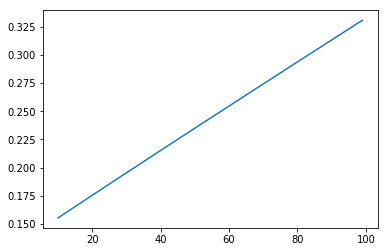

In [9]:
x = np.arange(10, 100)
pyplot.plot(x, mutual_information(x, 1));

In [10]:
mutual_information(30, x)

array([0.17617150625283173, 0.1798677803474682, 0.18352697897692494,
       0.1871489253753822, 0.19073345676440923, 0.16590630057513778,
       0.16767896744315713, 0.1694332518905366, 0.17116903706446962,
       0.17288621539444904, 0.17458468854575848, 0.17626436736354734,
       0.17792517180769352, 0.17956703087875425, 0.18118988253519674,
       0.18279367360228527, 0.18437835967285388, 0.1859439050002809,
       0.18749028238398857, 0.18901747304779448, 0.13721842285088037,
       0.13721842285088037, 0.13721842285088037, 0.13721842285088037,
       0.13721842285088037, 0.13721842285088037, 0.13721842285088037,
       0.13721842285088037, 0.13721842285088037, 0.13721842285088037,
       0.13721842285088037, 0.13721842285088037, 0.13721842285088037,
       0.13721842285088037, 0.13721842285088037, 0.13721842285088037,
       0.13721842285088037, 0.13721842285088037, 0.13721842285088037,
       0.13721842285088037, 0.13721842285088037, 0.13721842285088037,
       0.137218422850880